In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.graphics.mosaicplot import mosaic

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('Bank_Churn_Data.csv')

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#first 5 instances using "head()" function
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#last 5 instances using "tail()" function
df.tail()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
df.shape

(10000, 13)

In [ ]:
#printing all the columns present in data
df.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

Variable Identification and Conversion

In [ ]:
#closer look at the data types present in the data
df.dtypes

RowNumber            int64
CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
#get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Summary - 
1. RowNumber(1 - 1000) and CustomerId (bank customer identification) are unique numbers assigned to customers.
2. Credit score of the customer is best represented as integer the range varies from 350 to 850.
3. Geography is the location of country from which the customer belongs, three countries.
4. Gender if a customer is male or female.
5. Age of the customer ranging from 18 - 92 years.
6. Tenure represents the number of years the customer has been with the bank.
7. Balance determines the amount of money available for withdrawal represented as float variable.
8. NumOfProducts is the number of products a customer is using from the bank, there are major 4 products.
9. HasCrCard, whether the customer holds a credit card with the bank or not.
10. IsActiveMember, whether the customer is an active member with the bank or not.
11. EstimatedSalary salary($) of the customers ranging from 11.6 - 200k.
12. Exited is the response variable, 1 if the customer closed account with bank and 0 if the customer is retained.



In [ ]:
df.isna()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False


no missing values

In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.drop(['RowNumber','CustomerId'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_copy = df.copy()

In [ ]:
gender_categories = {'Male': 0, 'Female': 1}
geography_categories = {'France': 0, 'Spain': 1, 'Germany': 2}

df_copy['Gender'] = df_copy['Gender'].map(gender_categories)
df_copy['Geography'] = df_copy['Geography'].map(geography_categories)

In [ ]:
df_copy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

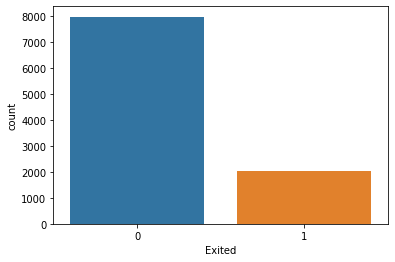

In [ ]:
sns.countplot(x="Exited", data=df)

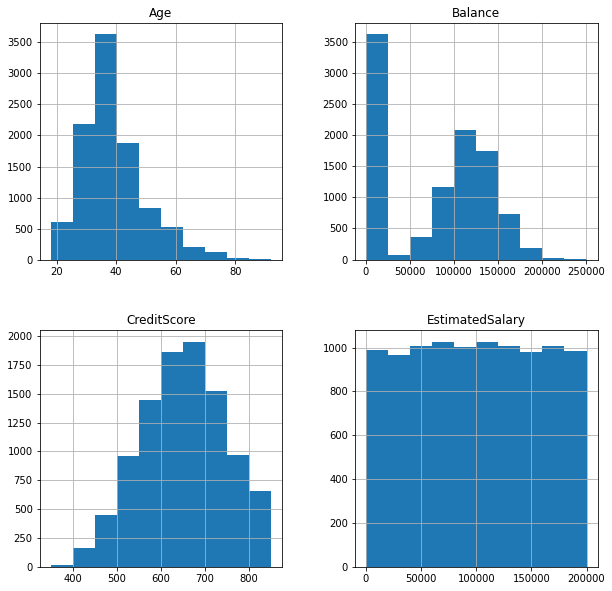

In [ ]:
df.hist(figsize=(10,10), column=["Age", "Balance", "CreditScore", "EstimatedSalary"])
plt.show()

Summary -

* Age is a bit right-skewed.
* Balance is fairly normal distributed.
* It is observed that Credit scores above 600 are higher, there is a possiblity that high quality customers will leave.



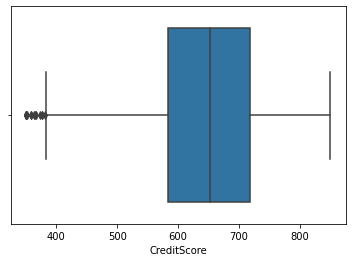

In [ ]:
sns.boxplot(x="CreditScore", data=df)

Text(0, 0.5, 'Frequency')

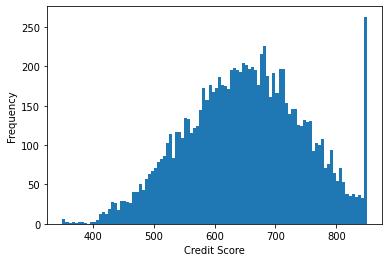

In [ ]:
df['CreditScore'].hist(bins=100, grid=False)
plt.xlabel("Credit Score", fontsize=10)
plt.ylabel("Frequency",fontsize=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


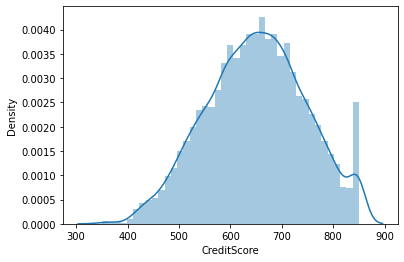

In [ ]:
sns.distplot(df['CreditScore'])

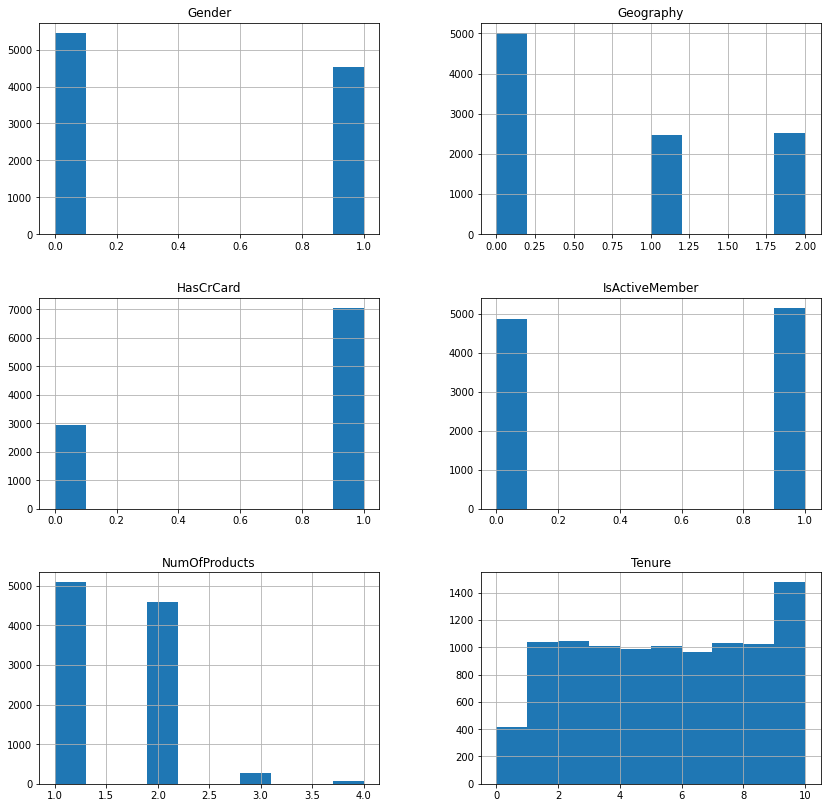

In [ ]:
df_copy.hist(figsize=(14,14), column=["Gender", "Geography", "HasCrCard", "IsActiveMember", "NumOfProducts", "Tenure"])
plt.show()

Summary - 
* We have more male(0) customers than females(1).
* Customers from France (most) (0), Germany(2) and Spain(1).
* Most of the customers have the bank’s credit card.
* We have about equal numbers of active and inactive members, which is not a promising indicator.
* The majority of customers only use one or two types of items, with only a handful using three or four.

**Age**

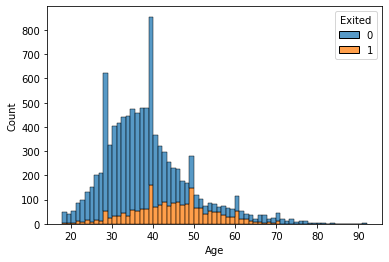

In [ ]:
sns.histplot(data=df, x='Age', hue='Exited', multiple="stack")

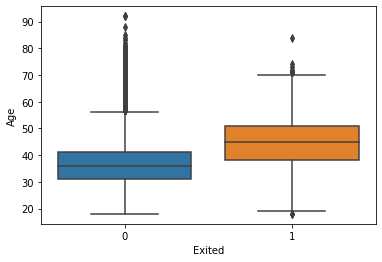

In [ ]:
sns.boxplot(x='Exited', y='Age', data=df)

Summary - 

* The distribution of customers staying is right-skewed (tend to be young). Outliers beyond the age of 60 may be our long-term consumers.
* Customers that have exited are invariably between the ages of 40 and 50. For retirement or a family situation, they may need to move to another banking provider.
* There is a significant difference between these two categories.



**Balance**

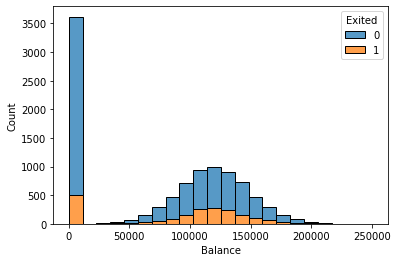

In [ ]:
sns.histplot(data=df, x='Balance', hue='Exited', multiple="stack")

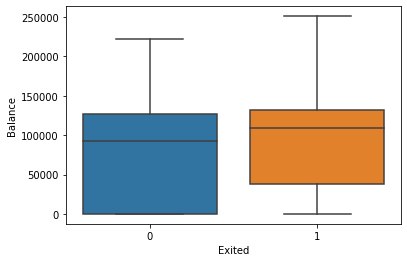

In [ ]:
sns.boxplot(x='Exited', y='Balance', data=df)


Summary -

* The distribution of these two categories is very similar.

* Consumers that stayed had smaller balances than the customers who left the bank, which is noteworthy.

**Credit Score**

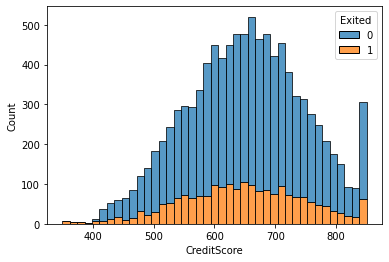

In [ ]:
sns.histplot(data=df, x='CreditScore', hue='Exited', multiple="stack")

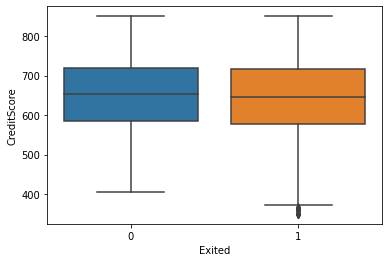

In [ ]:
sns.boxplot(x='Exited', y='CreditScore', data=df)

Summary -

* On the whole, the distribution is simmilar.

* Consumers with extremely low credit scores observed on the left tail as well as those with extremely high credit scores left, indicating that both extremely low and highly high quality customers are more readily leaving than ordinary customers.

**Estimated salary**

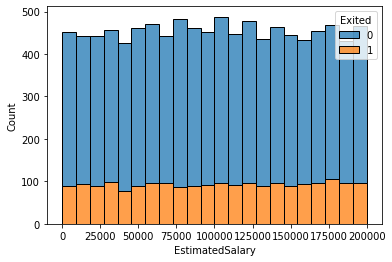

In [ ]:
sns.histplot(data=df, x='EstimatedSalary', hue='Exited', multiple="stack")

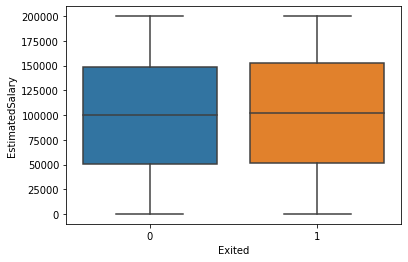

In [ ]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)

Summary -
* The distributions of both groups are extremely similar. 

* Estimated Salary may or may not be critical information in determining whether or not a customer would leave the bank.

**Gender**

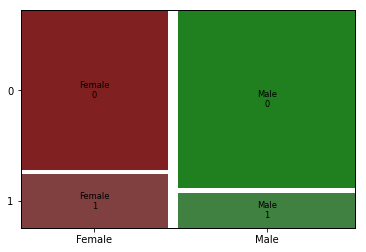

In [ ]:
mosaic(data=df, index=['Gender', 'Exited'], gap=0.03)
plt.show()

**Geography**

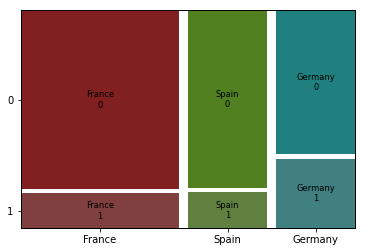

In [ ]:
mosaic(data=df, index=['Geography', 'Exited'], gap = 0.03)
plt.show()

In [ ]:
df[['Geography','Gender','Exited']].groupby(['Geography','Gender']).agg(['mean','count'])

Exited      
                      mean count
Geography Gender                
France    Female  0.203450  2261
          Male    0.127134  2753
Germany   Female  0.375524  1193
          Male    0.278116  1316
Spain     Female  0.212121  1089
          Male    0.131124  1388

* Females are more probable than males to leave the bank.

* Customers in Germany are more inclined than those in France and Spain to leave the bank.

**Has Credit Card**

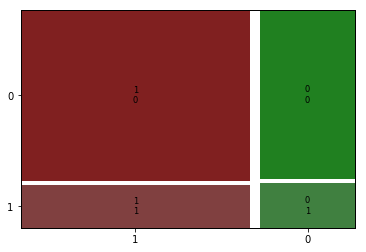

In [ ]:
mosaic(data=df, index=['HasCrCard', 'Exited'], gap = 0.03)
plt.show()

* HasCrCard may not be a helpful feature because we cannot predict whether or not customer having a credit card will churn.

**Is Active Member**

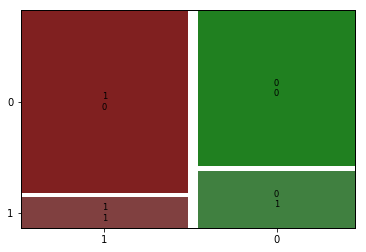

In [ ]:
mosaic(data=df, index=['IsActiveMember', 'Exited'], gap = 0.03)
plt.show()

* Churn is more prevalent among inactive consumers than among active customers (very reasonable variable)

**Number of Products**

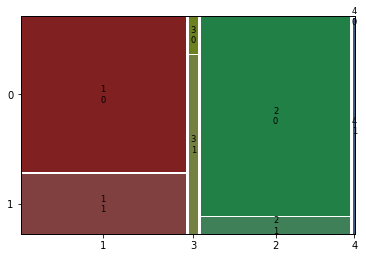

In [ ]:
mosaic(data=df, index=['NumOfProducts', 'Exited'], gap = 0.01)
plt.show()

* Customers who utilise three or four products are far more likely to leave.

**Tenure**

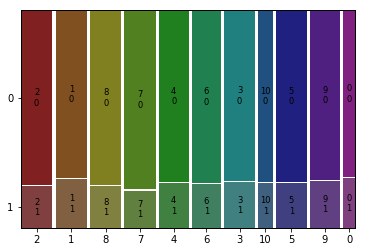

In [ ]:
mosaic(data=df, index=['Tenure', 'Exited'], gap = 0.01)
plt.show()

* Customers in various tenure categories do not appear to have a tendency to churn or stay.